In [51]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
import numpy as np

 - # 目的 : 用乘客搭乘的資訊來預估事發後有可能生存的人

In [52]:
data_train = pd.read_csv("titanicTrain.csv")
data_test  = pd.read_csv("titanicQuestion.csv")

In [53]:
data_train.keys()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [54]:
data_test.keys()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

 - 找有無搭上船及船編號對存貨率的影響

In [55]:
frame_boat = pd.DataFrame(data_train)

In [56]:
frame_0 = frame_boat['survived']
frame_1 = frame_boat['boat']

In [57]:
frame_s = pd.Series(frame_0[0:1000])
frame_b = pd.Series(frame_1[0:1000])
data_testt = {'survived':frame_s,'boat':frame_b}
frame_test = pd.DataFrame(data_testt)

In [58]:
frame_test.isnull().sum()

boat        583
survived      0
dtype: int64

In [59]:
frame_QQ = frame_test.sort_values(by = ['boat'] , ascending = False)
frame_QQ.index = range(len(frame_QQ))

In [60]:
frame_QQ_0 = pd.Series(frame_QQ['boat'][0:417])
frame_QQ_1 = pd.Series(frame_QQ['survived'][0:417])
data_QQ = {'boat':frame_QQ_0,'survived':frame_QQ_1}
frame_QQ_boat = pd.DataFrame(data_QQ)

In [61]:
frame_QQ_boat = frame_QQ_boat.sort_values(by = 'boat',ascending=True)
frame_QQ_boat.index = range(len(frame_QQ_boat))

In [62]:
bboat = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','A','B','C','D']
for i in range(len(bboat)):
    q = 0
    r = 0
    s = len(frame_QQ_boat.loc[frame_QQ_boat['boat'] == bboat[i]])
    q = frame_QQ_boat.loc[frame_QQ_boat['boat'] == bboat[i]].sum()    
    print( 'boat : ',bboat[i] ,'Survived_rate = ',q[1]/s*100 ,'%' )

boat :  1 Survived_rate =  100.0 %
boat :  2 Survived_rate =  100.0 %
boat :  3 Survived_rate =  100.0 %
boat :  4 Survived_rate =  100.0 %
boat :  5 Survived_rate =  100.0 %
boat :  6 Survived_rate =  100.0 %
boat :  7 Survived_rate =  100.0 %
boat :  8 Survived_rate =  100.0 %
boat :  9 Survived_rate =  100.0 %
boat :  10 Survived_rate =  100.0 %
boat :  11 Survived_rate =  100.0 %
boat :  12 Survived_rate =  94.73684210526315 %
boat :  13 Survived_rate =  100.0 %
boat :  14 Survived_rate =  96.55172413793103 %
boat :  15 Survived_rate =  100.0 %
boat :  16 Survived_rate =  100.0 %
boat :  A Survived_rate =  60.0 %
boat :  B Survived_rate =  83.33333333333334 %
boat :  C Survived_rate =  100.0 %
boat :  D Survived_rate =  93.75 %


In [63]:
##### IF no boat survived rate #####

In [64]:
frame_QQ_0 = pd.Series(frame_QQ['boat'][417:1000])
frame_QQ_1 = pd.Series(frame_QQ['survived'][417:1000])
data_QQ = {'boat':frame_QQ_0,'survived':frame_QQ_1}
frame_QQ_no_boat = pd.DataFrame(data_QQ)

In [65]:
frame_QQ_no_boat.sum(),frame_QQ_no_boat.isnull().sum()
print('no_boat_survived_rate : ',14/583*100 ,' % ')

no_boat_survived_rate :  2.401372212692967  % 


 - # 可以看出有無搭上船以及哪艘船對存活率的判斷很重要

In [66]:
###  ↓ ↓ ↓ ↓ ↓ ↓ 將文字替換成數字用以訓練 

 - Convert data_boat_survived_rate  to [0 ~ 100 % ]  ， 由於有無搭上船以及搭哪艘船對生存率影響很重要 ，所以有對各種船的生存率去做調整

In [67]:
h = {'1':100,'2':100,'3':100,'4':100,'5':100,'6':100,'7':100,'8':100,'9':100,'10':100,'11':100,'12':94.73,'13':100,'14':96.55,'15':100,'16':100,'A':60,'B':83.33,'C':100,'D':93.75,'NaN':2.4}

In [68]:
x = data_train['boat']
y = data_test['boat']
boat_data_train = x.map(h)
boat_data_test = y.map(h)
boat_data_train = boat_data_train.fillna(2.4)
boat_data_test = boat_data_test.fillna(2.4)

 - Convert data_sex [ female  &  male ] to [0 & 1]

In [69]:
z = {'female': 0, 'male': 1}

In [70]:
data_test.keys()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [71]:
x = data_train['sex']
y = data_test['sex']
sex_data_train = x.map(z)
sex_data_test = y.map(z)

 - Convert data_embarked [ S  &  C  &  Q ] to [ 0 & 1 & 2 ]

In [72]:
g = {'S': 0, 'C': 1, 'Q': 2}

In [73]:
x = data_train['embarked']
y = data_test['embarked']
embarked_data_train = x.map(g)
embarked_data_test = y.map(g)

 - Get data  [  survived  ,  sex  ,  age  ,  sibsp  ,  ticket  ] to train

In [74]:
data_train_tr = data_train.iloc[:,[4, 5 ,6 ,8 ,1]].values
data_test_te = data_test.iloc[:,[4, 5 ,6 ,8]].values

 - Use data [  survived  ,   sex  ,   age  ,   sibsp  ,   ticket  ,   embarked   ] to  train

In [75]:
# train = all ， survived = 14.5%

In [76]:
frame_train = pd.DataFrame(data_train_tr)
frame_0 = pd.Series(frame_train[0][0:750])
frame_1 = pd.Series(frame_train[1][0:750])
frame_2 = pd.Series(frame_train[2][0:750])
frame_3 = pd.Series(frame_train[3][0:750])
frame_4 = pd.Series(frame_train[4][0:750])
frame_5 = pd.Series(sex_data_train[0:750])
frame_6 = pd.Series(embarked_data_train[0:750])
frame_7 = pd.Series(boat_data_train[0:750])
data_train = {'age':frame_0,'sibsp':frame_1,'parch':frame_2,'fare':frame_3,'survived':frame_4,'sex':frame_5,'embarked':frame_6,'boat':frame_7}
frame_train = pd.DataFrame(data_train)

In [77]:
frame_test = pd.DataFrame(data_test_te)
frame_0 = pd.Series(frame_test[0])
frame_1 = pd.Series(frame_test[1])
frame_2 = pd.Series(frame_test[2])
frame_3 = pd.Series(frame_test[3])
frame_5 = pd.Series(sex_data_test[0:1000])
frame_6 = pd.Series(sex_data_test[0:1000])
frame_7 = pd.Series(sex_data_test[0:1000])
data_test = {'age':frame_0,'sibsp':frame_1,'parch':frame_2,'fare':frame_3,'sex':frame_5,'embarked':frame_6,'boat':frame_7}
frame_test = pd.DataFrame(data_test)

 - Test Model accuracy_rate

In [78]:
# train = 0.75(data_train) ；test = 0.25(data_train) ， Model accuracy_rate = 70%

In [79]:
# frame_train = pd.DataFrame(data_train_tr)
# frame_0 = pd.Series(frame_train[0][0:750])
# frame_1 = pd.Series(frame_train[1][0:750])
# frame_2 = pd.Series(frame_train[2][0:750])
# frame_3 = pd.Series(frame_train[3][0:750])
# frame_4 = pd.Series(frame_train[4][0:750])
# frame_5 = pd.Series(sex_data_train[0:750])
# frame_6 = pd.Series(embarked_data_train[0:750])
# frame_7 = pd.Series(boat_data_train[0:750])
# data_train = {'age':frame_0,'sibsp':frame_1,'parch':frame_2,'fare':frame_3,'survived':frame_4,'sex':frame_5,'embarked':frame_6,'boat':frame_7}
# frame_train = pd.DataFrame(data_train)

In [80]:
# boat_data_train
# boat_data_test

In [81]:
# frame_test = pd.DataFrame(data_train_tr)
# frame_0 = pd.Series(frame_test[0][750:1000])
# frame_1 = pd.Series(frame_test[1][750:1000])
# frame_2 = pd.Series(frame_test[2][750:1000])
# frame_3 = pd.Series(frame_test[3][750:1000])
# frame_5 = pd.Series(sex_data_train[750:1000])
# frame_6 = pd.Series(embarked_data_train[750:1000])
# frame_7 = pd.Series(boat_data_train[750:1000])
# data_test = {'age':frame_0,'sibsp':frame_1,'parch':frame_2,'fare':frame_3,'sex':frame_5,'embarked':frame_6,'boat':frame_7}
# frame_test = pd.DataFrame(data_test)

In [82]:
frame_train = frame_train.fillna(frame_train.mean())
frame_test = frame_test.fillna(frame_test.mean())

In [83]:
def get_testing_labels(training_samples, training_labels, testing_samples):
    normalizer       = Normalizer().fit(training_samples)
    training_samples = normalizer.transform(training_samples)
    testing_samples  = normalizer.transform(testing_samples)

    pca              = PCA(n_components=0.8, whiten=True).fit(training_samples)
    training_samples = pca.transform(training_samples)
    testing_samples  = pca.transform(testing_samples)

    svm_classifier   = SVC(C=2.8).fit(training_samples, training_labels)
    return svm_classifier.predict(testing_samples)

In [84]:
def main():
    # Read training and testing data
    training_df = frame_train
    testing_df  = frame_test 

    # Get training samples and labels from training data
    training_labels     = training_df['survived'].values
    training_samples    = training_df.drop(['survived'], axis = 1).values
    # Get testing samples from testing data
    testing_samples     = testing_df.values
    testing_labels      = get_testing_labels(training_samples, training_labels, testing_samples)
    
    # Writing testing labels to CSV
    testing_labels_df   = pd.DataFrame(testing_labels, columns=['Label'])
    testing_labels_df.index     += 1
    testing_labels_df.index.name = 'ImageId'
    testing_labels_df.to_csv('Predict_survived.csv', sep=',')

In [85]:
if __name__ == "__main__":
    main()

In [36]:
###############################################################################
###############################################################################
###############################################################################

 -  - Model predict accuracy rate

In [37]:
###############################################################################
###############################################################################
###############################################################################

In [38]:
# train = (data_train) ；test = (data_train) ， Model accuracy_rate = 97%

In [39]:
frame_train = pd.DataFrame(data_train_tr)
frame_0 = pd.Series(frame_train[0][0:750])
frame_1 = pd.Series(frame_train[1][0:750])
frame_2 = pd.Series(frame_train[2][0:750])
frame_3 = pd.Series(frame_train[3][0:750])
frame_4 = pd.Series(frame_train[4][0:750])
frame_5 = pd.Series(sex_data_train[0:750])
frame_6 = pd.Series(embarked_data_train[0:750])
frame_7 = pd.Series(boat_data_train[0:750])
data_train = {'age':frame_0,'sibsp':frame_1,'parch':frame_2,'fare':frame_3,'survived':frame_4,'sex':frame_5,'embarked':frame_6,'boat':frame_7}
frame_train = pd.DataFrame(data_train)

In [40]:
frame_test = pd.DataFrame(data_train_tr)
frame_0 = pd.Series(frame_test[0][750:1000])
frame_1 = pd.Series(frame_test[1][750:1000])
frame_2 = pd.Series(frame_test[2][750:1000])
frame_3 = pd.Series(frame_test[3][750:1000])
frame_5 = pd.Series(sex_data_train[750:1000])
frame_6 = pd.Series(embarked_data_train[750:1000])
frame_7 = pd.Series(boat_data_train[750:1000])
data_test = {'age':frame_0,'sibsp':frame_1,'parch':frame_2,'fare':frame_3,'sex':frame_5,'embarked':frame_6,'boat':frame_7}
frame_test = pd.DataFrame(data_test)

 - 缺失值( nan ) 用平均去帶入
 - 參考網站 : http://www.ppvke.com/Blog/archives/36612

In [41]:
frame_train = frame_train.fillna(frame_train.mean())
frame_test = frame_test.fillna(frame_test.mean())

In [98]:
frame_train.to_csv('frame_train.csv', sep=',')
frame_test.to_csv('frame_test.csv', sep=',')

 - ## Use NN_Model to train titanic data

In [107]:
from sklearn import datasets
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


 - Read titanic_data(clean data)

In [132]:
train_data = pd.read_csv('frame_train.csv')
test_data = pd.read_csv('frame_test.csv')

In [133]:
train_data.head()

,Unnamed: 0,age,boat,embarked,fare,parch,sex,sibsp,survived
0,0,29.0000,100.0,0.0,211.3375,0.0,0.0,0.0,1.0
1,1,0.9167,100.0,0.0,151.5500,2.0,1.0,1.0,1.0
2,2,2.0000,2.4,0.0,151.5500,2.0,0.0,1.0,0.0
3,3,30.0000,2.4,0.0,151.5500,2.0,1.0,1.0,0.0
4,4,25.0000,2.4,0.0,151.5500,2.0,0.0,1.0,0.0


In [134]:
test_data.head()

,Unnamed: 0,age,boat,embarked,fare,parch,sex,sibsp
0,0,24.281982,1,1,7.7500,0.0,1,0.0
1,1,24.281982,0,0,23.2500,0.0,0,2.0
2,2,24.281982,0,0,23.2500,0.0,0,2.0
3,3,24.281982,1,1,23.2500,0.0,1,2.0
4,4,24.281982,0,0,7.7875,0.0,0,0.0


In [135]:
train_data.drop(train_data.columns[[0]], axis=1, inplace=True)
test_data.drop(test_data.columns[[0]], axis=1, inplace=True)

In [137]:
train_data.shape,test_data.shape

((750, 8), (309, 7))

In [138]:
train_d = np.array(train_data)

In [153]:
train_da = np.delete(train_d,-1,1)
train_label = train_d[:,-1].reshape([-1, 1])

In [154]:
train_da.shape,train_label.shape

((750, 7), (750, 1))

In [156]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 7], name='input')
y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='prediction')

In [157]:
def _weight(shape):
    initial = tf.truncated_normal(mean=0, stddev=.5, shape=shape)
    return tf.Variable(initial)
def _bias(shape):
    initial = tf.constant(.25, shape=shape)
    return tf.Variable(initial)

In [158]:
w_1 = _weight([7, 128])
b_1 = _bias([128])
L1 = tf.nn.relu(tf.add(tf.matmul(x, w_1), b_1))

w_2 = _weight([128, 128])
b_2 = _bias([128])
L2 = tf.nn.relu(tf.add(tf.matmul(L1, w_2), b_2))

w_3 = _weight([128, 1])
b_3 = _bias([1])
_pred = tf.add(tf.matmul(L2, w_3), b_3)
pred = tf.sigmoid(_pred)

In [159]:
# loss = tf.reduce_mean(-y*tf.log(pred) - (1-y)*tf.log(1-pred))
loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=y,
                                       logits=_pred,)
op = tf.train.AdamOptimizer(learning_rate=1e-3)
update_step = op.minimize(loss)

In [160]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [163]:
epoch = 100
batch_size = 20
losses_train = list()
losses_test = list()
accus_train = list()
accus_test = list()
np.set_printoptions(precision=3)
for epo in range(epoch):
    # training
    for i in range(20):
        batch_x = train_da[i*batch_size:i*batch_size+batch_size]
        batch_y = train_label[i*batch_size:i*batch_size+batch_size]
        feed_dict = {x:batch_x, y:batch_y}
        _ = sess.run([update_step], feed_dict=feed_dict)
    # evaluation
    batch_x = train_da[:600]
    batch_y = train_label[:600]
    feed_dict = {x:batch_x, y:batch_y}
    p, l = sess.run([pred, loss], feed_dict=feed_dict)
    accu = (600 - np.sum(np.abs(batch_y - p.astype('int'))))/600
    losses_train.append(l)
    accus_train.append(accu)
    l_train = np.array([l])
    accu_train = np.array([accu])
    
    batch_x = train_da[600:]
    batch_y = train_label[600:]
    feed_dict = {x:batch_x, y:batch_y}
    p, l = sess.run([pred, loss], feed_dict=feed_dict)
    accu = (150 - np.sum(np.abs(batch_y - p.astype('int'))))/150
    losses_test.append(l)
    accus_test.append(accu)
    l_test = np.array([l])
    accu_test = np.array([accu])
    print('Epoch:', epo+1,
          ', Loss(train):', l_train,
          ', Accu(train):', accu_train,
          ', Loss(test):', l_test,
          ', Accu(test):', accu_test)

Epoch: 1 , Loss(train): [1.178] , Accu(train): [0.972] , Loss(test): [3.389] , Accu(test): [0.907]
Epoch: 2 , Loss(train): [1.504] , Accu(train): [0.957] , Loss(test): [3.441] , Accu(test): [0.9]
Epoch: 3 , Loss(train): [1.701] , Accu(train): [0.963] , Loss(test): [4.445] , Accu(test): [0.893]
Epoch: 4 , Loss(train): [1.995] , Accu(train): [0.973] , Loss(test): [2.079] , Accu(test): [0.967]
Epoch: 5 , Loss(train): [1.766] , Accu(train): [0.96] , Loss(test): [4.015] , Accu(test): [0.873]
Epoch: 6 , Loss(train): [1.632] , Accu(train): [0.95] , Loss(test): [3.224] , Accu(test): [0.867]
Epoch: 7 , Loss(train): [2.705] , Accu(train): [0.927] , Loss(test): [4.079] , Accu(test): [0.88]
Epoch: 8 , Loss(train): [1.269] , Accu(train): [0.975] , Loss(test): [1.219] , Accu(test): [0.98]
Epoch: 9 , Loss(train): [1.125] , Accu(train): [0.915] , Loss(test): [2.578] , Accu(test): [0.827]
Epoch: 10 , Loss(train): [0.738] , Accu(train): [0.975] , Loss(test): [2.169] , Accu(test): [0.96]
Epoch: 11 , Loss

Epoch: 85 , Loss(train): [0.591] , Accu(train): [0.977] , Loss(test): [2.167] , Accu(test): [0.973]
Epoch: 86 , Loss(train): [0.32] , Accu(train): [0.975] , Loss(test): [1.482] , Accu(test): [0.973]
Epoch: 87 , Loss(train): [0.691] , Accu(train): [0.975] , Loss(test): [2.018] , Accu(test): [0.98]
Epoch: 88 , Loss(train): [0.791] , Accu(train): [0.975] , Loss(test): [2.08] , Accu(test): [0.98]
Epoch: 89 , Loss(train): [0.61] , Accu(train): [0.975] , Loss(test): [1.452] , Accu(test): [0.98]
Epoch: 90 , Loss(train): [0.651] , Accu(train): [0.977] , Loss(test): [2.093] , Accu(test): [0.973]
Epoch: 91 , Loss(train): [0.911] , Accu(train): [0.975] , Loss(test): [2.3] , Accu(test): [0.98]
Epoch: 92 , Loss(train): [0.423] , Accu(train): [0.977] , Loss(test): [1.865] , Accu(test): [0.973]
Epoch: 93 , Loss(train): [0.257] , Accu(train): [0.958] , Loss(test): [1.272] , Accu(test): [0.973]
Epoch: 94 , Loss(train): [0.51] , Accu(train): [0.977] , Loss(test): [1.771] , Accu(test): [0.973]
Epoch: 95 

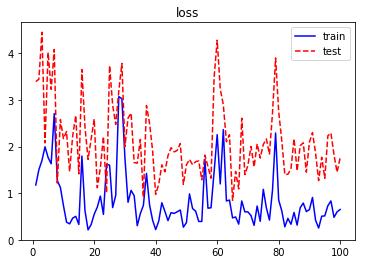

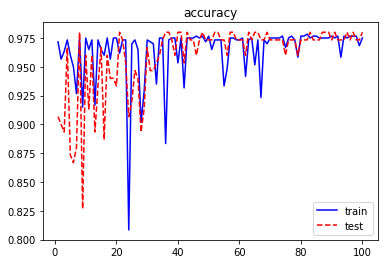

In [164]:
plt.plot(np.arange(epoch)+1, losses_train, 'b')
plt.plot(np.arange(epoch)+1, losses_test, '--r')
plt.legend(['train', 'test'])
plt.title('loss')
plt.show()

plt.plot(np.arange(epoch)+1, accus_train, 'b')
plt.plot(np.arange(epoch)+1, accus_test, '--r')
plt.legend(['train', 'test'])
plt.title('accuracy')
plt.show()